## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### IMPORTING OF LIBRARIES

In [52]:
import pandas as pd # for reading our data
import numpy as np  # for performing calculations
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

import scipy.stats as stat # to calculate statistical operations

from statsmodels.formula.api import ols #for creating a model

from sklearn.model_selection import train_test_split # for performing train train_test_split on our data
from sklearn.linear_model import LinearRegression # making a LinearRegression model
from sklearn.metrics import mean_squared_error # for calculating error metrics to evaluate our model

### LOADING DATA INTO A DATAFRAME


In [53]:
kc_data_df = pd.read_csv('data/kc_house_data.csv') # reading our data into a pandas data frame
kc_data_df.head() # checking the first 5 rows


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Lets explore our data  by creating a function  data_summary to show us the info and shape of our data frame

In [54]:
def data_summary(data):# a function that gives us a brief summary of our data frame
 # Shape of Data
  shape = data.shape
  # Info of Data
  info = data.info()  

  # Combining the information into a single string
  summary = f"Dataframe Shape: {shape}\n"
  summary += f"Dataframe Info:\n{info}"  

  return summary




In [55]:
data_summary(kc_data_df) # using the function to obtain a summary of our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

'Dataframe Shape: (21597, 21)\nDataframe Info:\nNone'

### DATA CLEANING



At these stage we will clean our data using the following steps

. **Completeness** (we will check for missing values , how they affect our data set and how we will handle them)

. **Consistency** (we will check for duplicate values and how to handle them)

. **Uniformity** ( we will check the data types as well as our columns naming for uniformity)

. **Validity** (we will handlle irrelevant columns and  check for outliers )

#### COMPLETENESS

In [56]:
# checking and summing up our missing values in our data set
kc_data_df.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We seem to have missing values in our waterfront(2376),view(63) and yr_renovated(3842). We will have to investigate further

In [57]:
# lets check for the percentage of missing values in our data set
for col in kc_data_df.columns: # we are using a for loop to iterate over our data
    if kc_data_df[col].isnull().sum() > 0:
        percentage = (kc_data_df[col].isnull().sum()/len(kc_data_df[col]))*100
        print("The column", col,"has",kc_data_df[col].isnull().sum(),"missing values, which is", round(percentage, 1),"% of it's total")

The column waterfront has 2376 missing values, which is 11.0 % of it's total
The column view has 63 missing values, which is 0.3 % of it's total
The column yr_renovated has 3842 missing values, which is 17.8 % of it's total


Lets further check each column with missing values

###### Waterfront column

Lets check for the value count of the unique elements

In [58]:
#checking for unique elements value count
print("The Waterfront Column\n")

print("Number of distinct elements is:", kc_data_df['waterfront'].nunique(),"\n")

print("This is the count of unique values:")
print(kc_data_df['waterfront'].value_counts(),"\n")

print('The unique values:')
print(kc_data_df['waterfront'].unique(),"\n")

print("Number of missing values:",kc_data_df['waterfront'].isnull().sum())

The Waterfront Column

Number of distinct elements is: 2 

This is the count of unique values:
NO     19075
YES      146
Name: waterfront, dtype: int64 

The unique values:
[nan 'NO' 'YES'] 

Number of missing values: 2376


The two unique values are YES and NO.NO is the most common value in this column with(19875) entries, whilst YES has just (146). This indicates that the majority of these homes lack a waterfront, hence it seems reasonable to presume that the homes with missing values  lack a waterfront. it is safe to substitute the missing values with NO

In [59]:
# replacing missing values with 'NO'
kc_data_df['waterfront'].fillna('NO',inplace=True)

# confirming if the missing values have been replaced
print(kc_data_df['waterfront'].value_counts())
print(kc_data_df['waterfront'].unique())

NO     21451
YES      146
Name: waterfront, dtype: int64
['NO' 'YES']


The change was successful because the number of NO entries increased from 19875 to 21451.

 ###### View column

Lets create a function to get our unique elements and sum up there value counts

In [60]:
def unique_counts(data, column): # creating a function for checking for unique elements and ther counts
    print("Number of distinct elements in", column, "column:", data[column].nunique())  # checking for unique elements in the column

    value_counts = data[column].value_counts()  # counting the value of each unique element

    # Use Series.apply with a Lambda Function
    format_lambda = lambda x: f"{x}: {value_counts[x]} ({value_counts[x] / len(data) * 100:.1f}%)"

    formatted_counts = value_counts.index.map(format_lambda)  # it will execute without creating the formatted_counts variable or printing its contents.
    print(formatted_counts)

    print(f"\nMissing values:", data[column].isnull().sum())  # combining the information


In [61]:
unique_counts(kc_data_df,'view')

Number of distinct elements in view column: 5
Index(['NONE: 19422 (89.9%)', 'AVERAGE: 957 (4.4%)', 'GOOD: 508 (2.4%)',
       'FAIR: 330 (1.5%)', 'EXCELLENT: 317 (1.5%)'],
      dtype='object')

Missing values: 63


In this column, NONE is the most frequent unique element. This indicates that the 63 missing values are representing homes  that don't have a view. Hence I WILL substitute  the missing values with NONE.

In [62]:
# replacing missing values with 'NONE'
kc_data_df['view'].fillna('NONE',inplace=True)

# confirming if the missing values have been replaced
print(kc_data_df['view'].value_counts())
print(kc_data_df['view'].unique())

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


Changes successfully made

###### Yr_renovated column

In [63]:
unique_counts(kc_data_df,'yr_renovated' )# using the unique_count function

Number of distinct elements in yr_renovated column: 70
Index(['0.0: 17011 (78.8%)', '2014.0: 73 (0.3%)', '2003.0: 31 (0.1%)',
       '2013.0: 31 (0.1%)', '2007.0: 30 (0.1%)', '2000.0: 29 (0.1%)',
       '2005.0: 29 (0.1%)', '1990.0: 22 (0.1%)', '2004.0: 22 (0.1%)',
       '2009.0: 21 (0.1%)', '1989.0: 20 (0.1%)', '2006.0: 20 (0.1%)',
       '2002.0: 17 (0.1%)', '1991.0: 16 (0.1%)', '1998.0: 16 (0.1%)',
       '1984.0: 16 (0.1%)', '1999.0: 15 (0.1%)', '2008.0: 15 (0.1%)',
       '2010.0: 15 (0.1%)', '2001.0: 15 (0.1%)', '1983.0: 15 (0.1%)',
       '2015.0: 14 (0.1%)', '1985.0: 14 (0.1%)', '1986.0: 14 (0.1%)',
       '1987.0: 14 (0.1%)', '1994.0: 14 (0.1%)', '1992.0: 13 (0.1%)',
       '1993.0: 12 (0.1%)', '1997.0: 12 (0.1%)', '1995.0: 12 (0.1%)',
       '1996.0: 11 (0.1%)', '1988.0: 11 (0.1%)', '1970.0: 9 (0.0%)',
       '2011.0: 9 (0.0%)', '1980.0: 8 (0.0%)', '1982.0: 8 (0.0%)',
       '2012.0: 8 (0.0%)', '1979.0: 7 (0.0%)', '1977.0: 7 (0.0%)',
       '1968.0: 7 (0.0%)', '1975.0: 5 (0.

 The years span from 1948–2014 and 0.0 is the most frequent value thus  we'll replace the missing values with 0.0 because we don't know what 0.0 means based  on this data.

In [64]:
# replacing missing values with '0.0'
kc_data_df['yr_renovated'].fillna(0.0,inplace=True)

# confirming if the missing values have been replaced
print(kc_data_df['yr_renovated'].value_counts())
print(kc_data_df['yr_renovated'].unique())

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64
[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


The changes are made successfully

In [65]:
# checking to see if there are any more missing values
kc_data_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values

  #### CONSISTENCY

In [66]:
# Checking for duplicate values
kc_data_df.duplicated().sum()

0

There are no duplicate values

#### UNIFORMITY

**Converting  Data Types of Values in Columns from Object  to Float**

The sqft_basement values are in objects data type, given that this column has numeric values.  let's try to investigate  the reason why the datatype isn't a float or integer. 

In [67]:
kc_data_df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1770.0        1
2300.0        1
915.0         1
3260.0        1
2730.0        1
Name: sqft_basement, Length: 304, dtype: int64

 These values represented by "?" string can be regarded as null values. We  will replace the "?"  with 0.0, because the majority of the values are at 0.0.

In [68]:
# replacing the ? with 0.0
kc_data_df['sqft_basement'].replace('?','0.0',inplace=True)

#converting column to data type 'float'
kc_data_df['sqft_basement'] = kc_data_df['sqft_basement'].astype(float)

#confirming the change 
kc_data_df['sqft_basement'].dtype

dtype('float64')

We have successfully changed the data type to  a float

 **Converting the Date Column to month and year and Creating  new Columns  month and year**

The month and year the houses were sold are shown in the date column and data can be analysed easily by creating new columns called year and month  from this column, 

In [69]:
# Spliting the date into month, day, and year
date_split = kc_data_df['date'].str.split('/', expand=True)

# Creating new columns for month and year and converting the values to integers
kc_data_df['month_sold'] = date_split[0].astype(int)
kc_data_df['year_sold'] = date_split[2].astype(int)

# Droping the original date column
kc_data_df.drop(columns=['date'], inplace=True)

# Verifying the changes
print("DataFrame after splitting date:")
print(kc_data_df.head())


DataFrame after splitting date:
           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  ... sqft_basement  yr_built  yr_renovated  \
0         NO  NONE    Average  ...           0.0      1955           0.0   
1         NO  NONE    Average  ...         400.0      1951        1991.0   
2         NO  NONE    Average  ...           0.0      1933           0.0   
3         NO  NONE  Very Good  ...         910.0      1965           0.0   
4         NO  NONE    Average  ...           0.0      1987           0.0   

   zipcode      lat     long  sqft_l

We can seen the two columns have been  created and added to our dataset

#### VALIDITY

In [70]:
#checking for outliers using intequatrile for each column

Q1 = kc_data_df.quantile(0.25) # First quartile
Q3 = kc_data_df.quantile(0.75) # Third quartile
IQR = Q3 - Q1

print(IQR)

id               5.185851e+09
price            3.230000e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.120000e+03
sqft_lot         5.645000e+03
floors           1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.500000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.069000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
month_sold       5.000000e+00
year_sold        1.000000e+00
dtype: float64


we have the above outliers lets visualize them using boxplots to investigate further

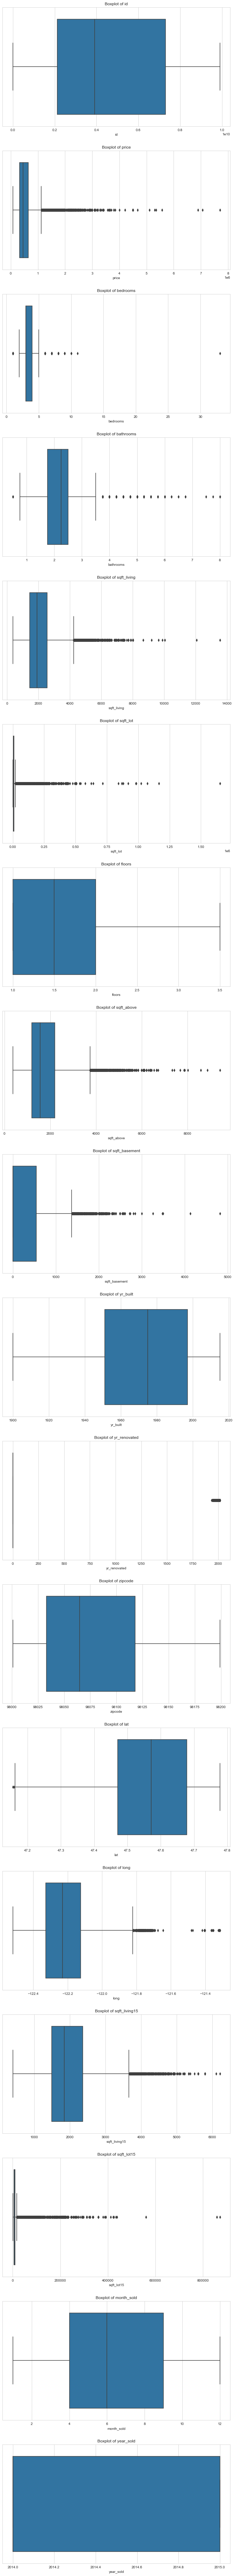

In [71]:

# Plotting box plots to visualize our outliers
# Creating a list of column names excluding non-numeric columns (if any)
numeric_columns = kc_data_df.select_dtypes(include=['number']).columns

# Seting up the figure and axes
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 6 * len(numeric_columns)))

# Iterating over each numeric column and create a boxplot
for i, column in enumerate(numeric_columns):
    ax = axes[i] if len(numeric_columns) > 1 else axes  # If there's only one numeric column, axes is not a list
    
    # Creating the boxplots
    sns.boxplot(x=kc_data_df[column], ax=ax)
    
    # Seting titles and labels
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)
    

plt.tight_layout(pad=3.0)  # Adjusting the spacing between subplots
plt.subplots_adjust(top=0.95)  # Adjusting the top margin to accommodate titles   



There is a significant amount of outliers in a number of our columns let remove them

In [72]:
# kc_data_df = outliers_df_iqr # storing our cleaned data in our original variable kc_data_df
kc_data_df.shape

(21597, 22)

we have removed our outliers  since they would have affected our model performance

#### Conversion of the bedroom feature into a Categorical Feature

Analysing the `bedroom` feature in our dataset we observe that although it is stored in numerical form, it is actually a categorical feature.

In [73]:
kc_data_df['bedrooms'] = kc_data_df['bedrooms'].astype('category')

In [74]:
kc_data_df['bedrooms'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33], ordered=False)

#### FEATURE ENGINEERING

Lets create additional columns to determine the age of a house by getting the differnce between 2015 (that's when the data was last recorded) the reference year and yr_built, and another column age of the house after renovation by also getting the difference between 2015 and yr_renovated

These new columns will help to determine whether the age of built or renovation has an impact on the price of the house

In [75]:
# creating a new column 'age_built' showing the age of house since its was built upto 2015
kc_data_df['age_built'] = 2015 - kc_data_df['yr_built']

In [76]:
#creating a new column 'age_renovated'showing the age of a house after renovation
kc_data_df['age_renovated'] = (2015 - kc_data_df['yr_renovated']).apply(lambda x: 0 if x == 2015 else x)

In [77]:
kc_data_df.columns # checking to see if the two columns have been added

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold', 'age_built',
       'age_renovated'],
      dtype='object')

In [78]:
kc_data_df.head(10) # viewing the first ten rows of our data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_built,age_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,...,0.0,98178,47.5112,-122.257,1340,5650,10,2014,60,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,64,24.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,98028,47.7379,-122.233,2720,8062,2,2015,82,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,0.0,98136,47.5208,-122.393,1360,5000,12,2014,50,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28,0.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,...,0.0,98053,47.6561,-122.005,4760,101930,5,2014,14,0.0
6,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,...,0.0,98003,47.3097,-122.327,2238,6819,6,2014,20,0.0
7,2008000270,291850.0,3,1.50,1060,9711,1.0,NO,NONE,Average,...,0.0,98198,47.4095,-122.315,1650,9711,1,2015,52,0.0
8,2414600126,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,...,0.0,98146,47.5123,-122.337,1780,8113,4,2015,55,0.0
9,3793500160,323000.0,3,2.50,1890,6560,2.0,NO,NONE,Average,...,0.0,98038,47.3684,-122.031,2390,7570,3,2015,12,0.0


In [79]:
# creating a season dictonary using months in numerical order
season_dict = {1:'Winter',
           2:'Winter',
           3:'Spring',
           4:'Spring',
           5:'Spring',
           6:'Summer',
           7:'Summer',
           8:'Summer',
           9:'Fall',
           10:'Fall',
           11:'Fall',
           12:'Winter'}
# creating a new column and mapping it to season_dict
kc_data_df['season_sold'] = kc_data_df['month_sold'].map(season_dict)

In [80]:
kc_data_df # checking if the new column was added

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_built,age_renovated,season_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,...,98178,47.5112,-122.257,1340,5650,10,2014,60,0.0,Fall
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,98125,47.7210,-122.319,1690,7639,12,2014,64,24.0,Winter
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,98028,47.7379,-122.233,2720,8062,2,2015,82,0.0,Winter
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,98136,47.5208,-122.393,1360,5000,12,2014,50,0.0,Winter
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,98074,47.6168,-122.045,1800,7503,2,2015,28,0.0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,98103,47.6993,-122.346,1530,1509,5,2014,6,0.0,Spring
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,98146,47.5107,-122.362,1830,7200,2,2015,1,0.0,Winter
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,98144,47.5944,-122.299,1020,2007,6,2014,6,0.0,Summer
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,...,98027,47.5345,-122.069,1410,1287,1,2015,11,0.0,Winter


## Data Visualization

Before diving into the modeling phase, we will create visualizations to uncover trends within the dataset. The main focus was on visualizing price as the dependent variable, with waterfront and condition as the independent categorical variables. Additionally, we will explore Bedrooms, Bathrooms, sq_liv, and sq_lot as our independent numerical variables. These visualizations were essential in understanding the dynamics of the data and identifying key factors influencing property prices.

#### Univariate Analysis

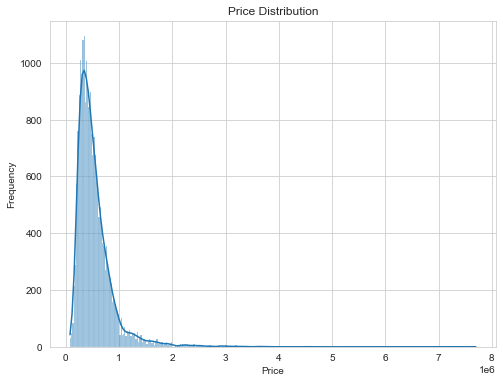

In [81]:
# Histogram of 'price' as dependent variable 
plt.figure(figsize=(8, 6))
sns.histplot(data=kc_data_df, x='price', kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram of 'price' reveals a positively skewed distribution, indicating that a significant number of properties have lower prices while fewer properties command higher prices. To address this skewness and achieve a more symmetrical distribution, we will do a log transformation.

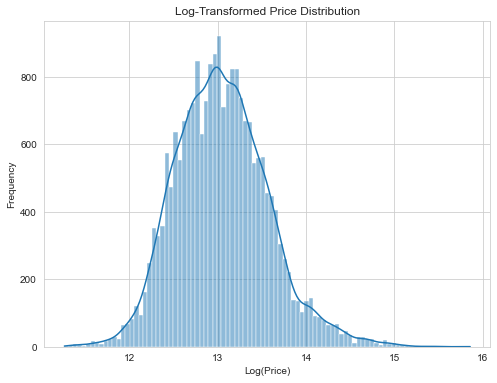

In [82]:
#log tranformation for 'price'
kc_data_df['price_log'] = np.log(kc_data_df['price'])

# Plot histogram of the transformed 'price'
plt.figure(figsize=(8, 6))
sns.histplot(data=kc_data_df, x='price_log', kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

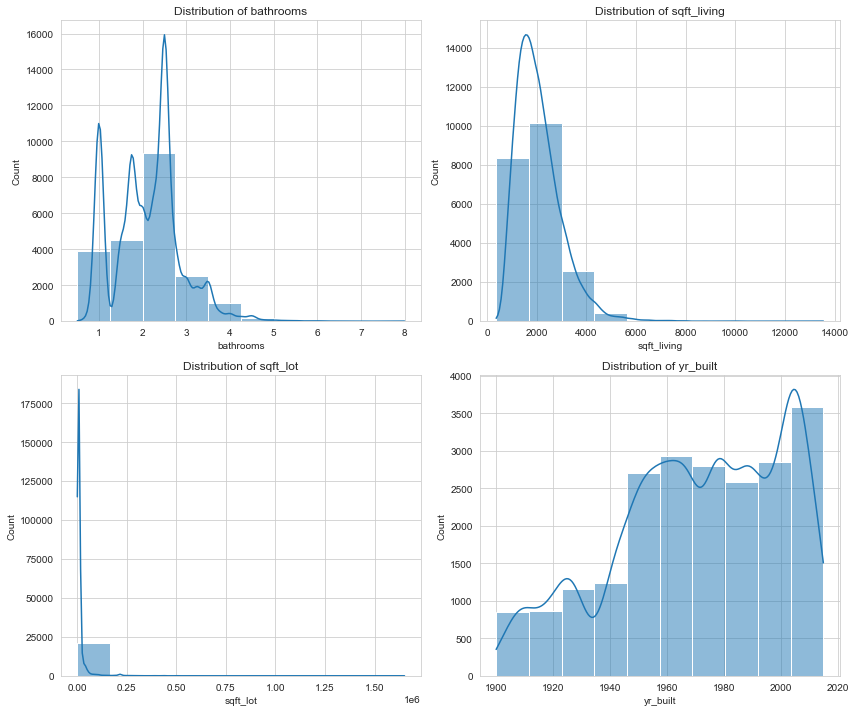

In [83]:
#the independent variables
num = ['bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']
# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop through each numeric variable and create a distplot
for i, col in enumerate(num):
    sns.histplot(data=kc_data_df[col], ax=axes[i//2, i%2], bins=10, kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

#### Log Transformation for the independent variables

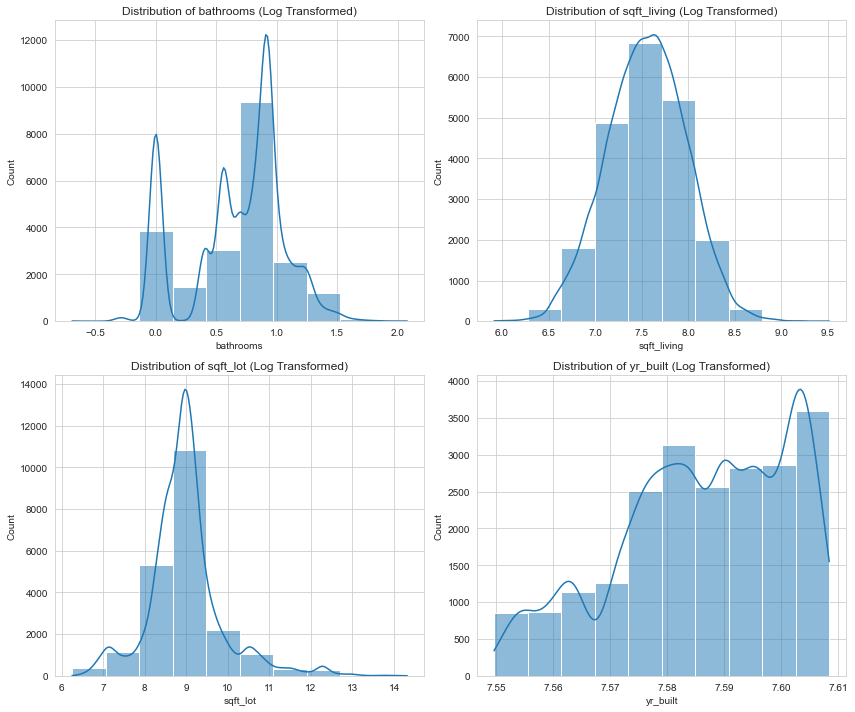

In [84]:
# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop through each numeric variable, log-transform, and create a distplot
for i, col in enumerate(num):
    # Log-transform the variable
    log_values = np.log(kc_data_df[col])
    
    # Plot the log-transformed variable
    sns.histplot(data=log_values, ax=axes[i//2, i%2], bins=10, kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {col} (Log Transformed)')

# Adjust layout
plt.tight_layout()
plt.show()

#### Bivariate Analysis 

Next we will be checking the relationship between price and the numeric independent variables that we will be using.

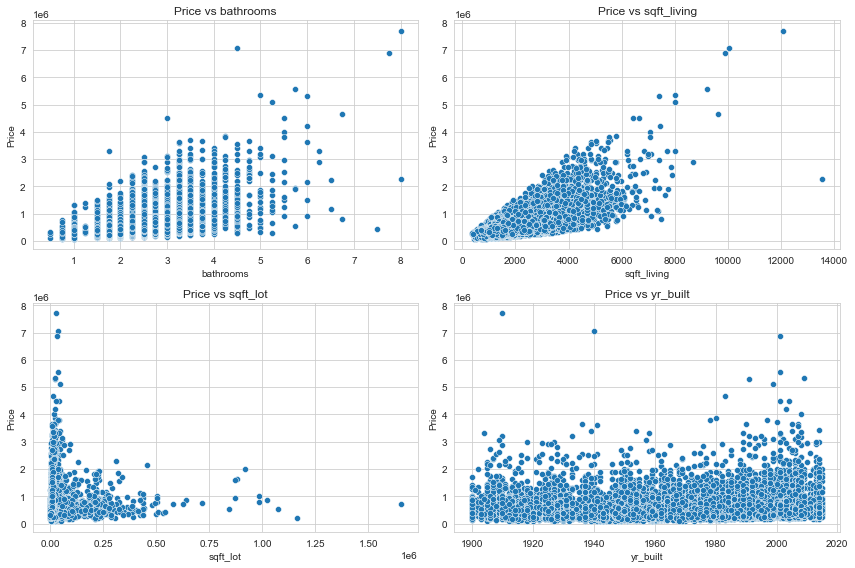

In [85]:
# bivariate analysis for the numerical independent variables
plt.figure(figsize=(12, 8))

for var in num:
    plt.subplot(2, 2, num.index(var) + 1)
    sns.scatterplot(x=var, y='price', data=kc_data_df)
    plt.title(f'Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

Only bathrooms and sqft_living have a linear relationship with price 

#### Categorical Variables

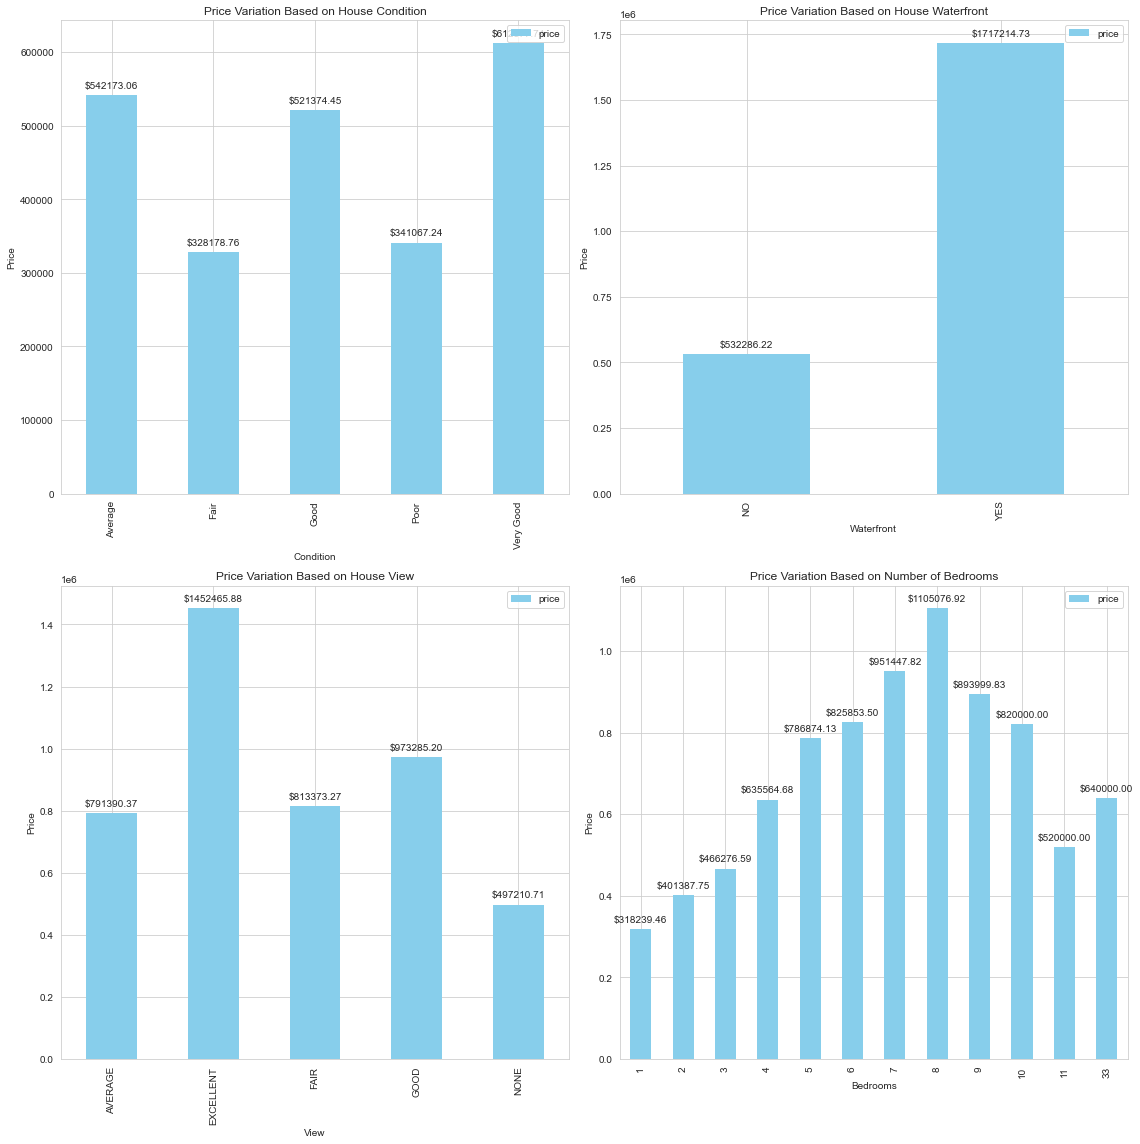

In [86]:
# Define the plots to be created
plots = [
    ('Price Variation Based on House Condition', 'condition', 'Price'),
    ('Price Variation Based on House Waterfront', 'waterfront', 'Price'),
    ('Price Variation Based on House View', 'view', 'Price'),
    ('Price Variation Based on Number of Bedrooms', 'bedrooms', 'Price')
]

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the plots and create bar plots for each
for i, (title, x_col, y_col) in enumerate(plots):
    # Calculate the average price for each group
    avg_prices = kc_data_df.groupby(x_col)['price'].mean()
    
    # Convert the series to a DataFrame for plotting
    avg_prices_df = avg_prices.reset_index()
    
    # Create a bar plot for the current plot using Pandas' plot function
    avg_prices_df.plot.bar(x=x_col, y='price', ax=axes[i], color='skyblue', edgecolor='none')
    
    # Set the title, x-axis label, and y-axis label for the current subplot
    axes[i].set_title(title)
    axes[i].set_xlabel(x_col.capitalize())
    axes[i].set_ylabel(y_col)

    # Add value labels on top of each bar
    for p in axes[i].patches:  # Loop for each patch (bar) in the current subplot axes[i]
        # Add an annotation to the current subplot
        axes[i].annotate(f"${p.get_height():.2f}",  # Format the annotation with two decimal places and a dollar sign
                         (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the annotation at the top center of each bar
                         ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')  # Annotation properties

# Adjust the layout of the subplots for better visualization
plt.tight_layout()
plt.show()


In [87]:
kc_data_df['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64

#### Correlation

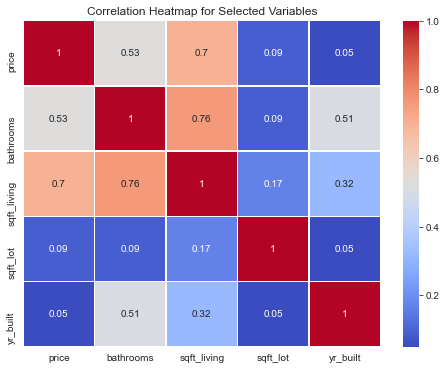

In [88]:
# Define the variables you want to include in the correlation matrix
selected_vars = ['price','bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']

# Compute correlation matrix for the selected variables
corr_matrix_selected = kc_data_df[selected_vars].corr()
rounded_corr_matrix_selected = np.round(corr_matrix_selected, 2)

# Plot the correlation heatmap for the selected variables
plt.figure(figsize=(8, 6))
sns.heatmap(rounded_corr_matrix_selected, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Selected Variables')
plt.show()
